In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# ==============================
# 1. Caricamento dataset
# ==============================
data = pd.read_csv("student_pe_performance.csv")  # salva i tuoi dati in un file dataset.csv


In [14]:
data

,Age,Gender,Grade_Level,Strength_Score,Endurance_Score,Flexibility_Score,Speed_Agility_Score,BMI,Health_Fitness_Knowledge_Score,Skills_Score,Class_Participation_Level,Attendance_Rate,Motivation_Level,Overall_PE_Performance_Score,Improvement_Rate,Final_Grade,Previous_Semester_PE_Grade,Hours_Physical_Activity_Per_Week,Performance
0,16,2,0,46.642153,46.429238,50.363292,51.647608,29.237225,83.467708,62.546020,2,79.090405,2,71.983935,3.806210,0,1,6.141111,2
1,17,1,3,66.690215,66.508482,71.183308,50.508877,21.127816,53.727726,67.261465,0,92.294441,2,69.908176,1.651061,1,0,5.055664,0
2,14,1,2,47.404086,48.199333,48.805379,51.733417,18.609464,74.009057,55.150633,2,91.857339,0,64.822426,4.781953,2,1,6.514409,0
3,16,2,2,34.968570,51.506917,56.785577,52.439532,19.391644,68.971793,69.474886,2,99.498886,2,72.178023,5.068751,0,2,2.916263,0
4,16,1,2,47.542569,47.923138,34.064097,47.767977,17.641468,79.322630,57.834987,0,99.640018,2,74.755884,5.321179,1,1,9.975924,0
5,15,0,1,55.234568,65.789123,72.456789,68.345612,22.567891,71.234567,73.456789,0,88.234567,0,78.567891,6.789123,0,0,8.567891,1
6,17,1,0,42.123456,48.678901,51.234567,49.567890,26.789123,65.123456,60.234567,2,75.678901,2,68.345612,4.123456,1,2,5.678901,2
7,14,0,3,38.789123,44.567890,47.890123,46.123456,31.234567,58.789123,56.345612,1,70.123456,1,62.567890,3.456789,2,2,4.234567,2
8,16,2,1,68.456789,72.123456,75.678901,74.234567,20.567891,82.345612,78.901234,0,95.123456,0,85.678901,7.234567,0,0,10.456789,1
9,15,1,2,52.678901,58.234567,62.456789,59.789123,24.123456,69.567890,66.123456,2,82.789123,2,72.345612,5.567890,1,1,7.123456,0


In [15]:
# ==============================
# 2. Esplorazione iniziale
# ==============================
print(data.info())
print(data['Performance'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 19 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Age                               20 non-null     int64  
 1   Gender                            20 non-null     int64  
 2   Grade_Level                       20 non-null     int64  
 3   Strength_Score                    20 non-null     float64
 4   Endurance_Score                   20 non-null     float64
 5   Flexibility_Score                 20 non-null     float64
 6   Speed_Agility_Score               20 non-null     float64
 7   BMI                               20 non-null     float64
 8   Health_Fitness_Knowledge_Score    20 non-null     float64
 9   Skills_Score                      20 non-null     float64
 10  Class_Participation_Level         20 non-null     int64  
 11  Attendance_Rate                   20 non-null     float64
 12  Motivation

In [16]:
# ==============================
# 🔄 RICARICAMENTO DATASET COMPLETO
# ==============================
print("🔄 Ricaricando il dataset completo...")

# Ricarica il dataset completo
data = pd.read_csv("student_pe_performance.csv")

print(f"📊 Dataset caricato: {data.shape[0]} righe, {data.shape[1]} colonne")
print(f"📈 Distribuzione classi Performance:")
print(data['Performance'].value_counts())
print(f"\n📋 Prime 5 righe del dataset:")
print(data.head())

🔄 Ricaricando il dataset completo...
📊 Dataset caricato: 500 righe, 20 colonne
📈 Distribuzione classi Performance:
Performance
Low Performer        245
Average Performer    243
High Performer        12
Name: count, dtype: int64

📋 Prime 5 righe del dataset:
   ID  Age Gender Grade_Level  Strength_Score  Endurance_Score  \
0   1   16  Other        10th       46.642153        46.429238   
1   2   17   Male         9th       66.690215        66.508482   
2   3   14   Male        12th       47.404086        48.199333   
3   4   16  Other        12th       34.968570        51.506917   
4   5   16   Male        12th       47.542569        47.923138   

   Flexibility_Score  Speed_Agility_Score        BMI  \
0          50.363292            51.647608  29.237225   
1          71.183308            50.508877  21.127816   
2          48.805379            51.733417  18.609464   
3          56.785577            52.439532  19.391644   
4          34.064097            47.767977  17.641468   

   Healt

In [17]:
# ==============================
# 🔄 RIPROCESSAMENTO DATASET COMPLETO
# ==============================
print("🔄 Riprocessando il dataset completo...")

# Label encoding per le variabili categoriche
categorical_cols = data.select_dtypes(include=['object']).columns
print(f"📋 Colonne categoriche trovate: {list(categorical_cols)}")

label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le
    print(f"✅ {col}: {len(le.classes_)} classi - {list(le.classes_)}")

# Divisione feature/target con dataset completo
X = data.drop("Performance", axis=1)
y = data["Performance"]

print(f"\n📊 Dimensioni finali:")
print(f"   Features (X): {X.shape}")
print(f"   Target (y): {y.shape}")
print(f"   Distribuzione target: {y.value_counts().to_dict()}")

# Standardizzazione
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Nuova divisione train/test con dataset completo
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

print(f"\n🎯 Divisione train/test:")
print(f"   Training set: {X_train.shape[0]} campioni")
print(f"   Test set: {X_test.shape[0]} campioni")
print(f"   Distribuzione train: {pd.Series(y_train).value_counts().to_dict()}")
print(f"   Distribuzione test: {pd.Series(y_test).value_counts().to_dict()}")

🔄 Riprocessando il dataset completo...
📋 Colonne categoriche trovate: ['Gender', 'Grade_Level', 'Class_Participation_Level', 'Motivation_Level', 'Final_Grade', 'Previous_Semester_PE_Grade', 'Performance']
✅ Gender: 3 classi - ['Female', 'Male', 'Other']
✅ Grade_Level: 4 classi - ['10th', '11th', '12th', '9th']
✅ Class_Participation_Level: 3 classi - ['High', 'Low', 'Medium']
✅ Motivation_Level: 3 classi - ['High', 'Low', 'Medium']
✅ Final_Grade: 5 classi - ['A', 'B', 'C', 'D', 'F']
✅ Previous_Semester_PE_Grade: 5 classi - ['A', 'B', 'C', 'D', 'F']
✅ Performance: 3 classi - ['Average Performer', 'High Performer', 'Low Performer']

📊 Dimensioni finali:
   Features (X): (500, 19)
   Target (y): (500,)
   Distribuzione target: {2: 245, 0: 243, 1: 12}

🎯 Divisione train/test:
   Training set: 400 campioni
   Test set: 100 campioni
   Distribuzione train: {2: 196, 0: 194, 1: 10}
   Distribuzione test: {2: 49, 0: 49, 1: 2}


In [18]:
# ==============================
# 🚀 ADDESTRAMENTO MODELLO CON DATASET COMPLETO
# ==============================
print("🚀 Addestrando il modello con il dataset completo...")

# Modello baseline per confronto
rf_baseline = RandomForestClassifier(n_estimators=100, random_state=42)
rf_baseline.fit(X_train, y_train)
y_pred_baseline = rf_baseline.predict(X_test)
baseline_accuracy = accuracy_score(y_test, y_pred_baseline)
baseline_confidence = np.mean(np.max(rf_baseline.predict_proba(X_test), axis=1))

print(f"📊 BASELINE (parametri default):")
print(f"   Accuracy: {baseline_accuracy:.4f}")
print(f"   Confidenza media: {baseline_confidence:.4f} ({baseline_confidence*100:.1f}%)")

# Grid Search ottimizzato per dataset più grande
param_grid_full = {
    'n_estimators': [200, 300, 500],
    'max_depth': [15, 20, 25, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None],
    'class_weight': [None, 'balanced', 'balanced_subsample']
}

print(f"\n🔄 Grid Search con {len(param_grid_full['n_estimators']) * len(param_grid_full['max_depth']) * len(param_grid_full['min_samples_split']) * len(param_grid_full['min_samples_leaf']) * len(param_grid_full['max_features']) * len(param_grid_full['class_weight'])} combinazioni...")

# Grid Search con cross validation
rf_grid_full = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid=param_grid_full,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

rf_grid_full.fit(X_train, y_train)

print(f"✅ Migliori parametri: {rf_grid_full.best_params_}")
print(f"🎯 Miglior score CV: {rf_grid_full.best_score_:.4f}")

# Modello ottimizzato
rf_model_full = rf_grid_full.best_estimator_
y_pred_full = rf_model_full.predict(X_test)
y_pred_proba_full = rf_model_full.predict_proba(X_test)

full_accuracy = accuracy_score(y_test, y_pred_full)
full_confidence = np.mean(np.max(y_pred_proba_full, axis=1))

print(f"\n🎉 RISULTATI FINALI:")
print(f"   Accuracy: {full_accuracy:.4f} (miglioramento: {full_accuracy-baseline_accuracy:+.4f})")
print(f"   Confidenza media: {full_confidence:.4f} ({full_confidence*100:.1f}%)")
print(f"   Miglioramento confidenza: {(full_confidence-baseline_confidence)*100:+.1f}%")

🚀 Addestrando il modello con il dataset completo...
📊 BASELINE (parametri default):
   Accuracy: 0.9800
   Confidenza media: 0.7627 (76.3%)

🔄 Grid Search con 972 combinazioni...
Fitting 5 folds for each of 972 candidates, totalling 4860 fits
✅ Migliori parametri: {'class_weight': None, 'max_depth': 15, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
🎯 Miglior score CV: 0.9925

🎉 RISULTATI FINALI:
   Accuracy: 0.9900 (miglioramento: +0.0100)
   Confidenza media: 0.9789 (97.9%)
   Miglioramento confidenza: +21.6%


In [19]:
# ==============================
# 💾 SALVATAGGIO MODELLO FINALE OTTIMIZZATO
# ==============================
print("💾 Salvando il modello finale ottimizzato...")

try:
    # Backup modello precedente
    if os.path.exists("random_forest_model.pkl"):
        shutil.copy2("random_forest_model.pkl", "random_forest_model_old.pkl")
        print("📁 Backup creato: random_forest_model_old.pkl")
    
    # Salva il modello ottimizzato con dataset completo
    joblib.dump(rf_model_full, "random_forest_model.pkl")
    joblib.dump(scaler, "scaler.pkl")
    joblib.dump(label_encoders, "label_encoders.pkl")
    
    print("✅ Modello finale salvato con successo!")
    
    # Test di caricamento
    test_model = joblib.load("random_forest_model.pkl")
    test_predictions = test_model.predict(X_test[:5])
    test_probabilities = test_model.predict_proba(X_test[:5])
    
    print(f"🧪 Test caricamento:")
    print(f"   Prime 5 predizioni: {test_predictions}")
    print(f"   Confidenze: {np.max(test_probabilities, axis=1):.3f}")
    
    # Statistiche finali
    print(f"\n📈 STATISTICHE FINALI DEL MODELLO:")
    print(f"   🎯 Accuracy: {full_accuracy*100:.1f}%")
    print(f"   🔥 Confidenza media: {full_confidence*100:.1f}%")
    print(f"   📊 Campioni training: {X_train.shape[0]}")
    print(f"   🧪 Campioni test: {X_test.shape[0]}")
    print(f"   ⚙️  Parametri ottimali: {rf_grid_full.best_params_}")
    
    print(f"\n🎉 MODELLO PRONTO PER PRODUZIONE!")
    print(f"   Il server Flask ora avrà performance eccezionali!")
    
except Exception as e:
    print(f"❌ Errore nel salvataggio: {e}")

💾 Salvando il modello finale ottimizzato...
📁 Backup creato: random_forest_model_old.pkl
✅ Modello finale salvato con successo!
🧪 Test caricamento:
   Prime 5 predizioni: [2 0 0 2 2]
❌ Errore nel salvataggio: unsupported format string passed to numpy.ndarray.__format__


In [20]:
# ==============================
# ✅ VERIFICA FINALE E REPORT
# ==============================
print("✅ VERIFICA FINALE DEL MODELLO:")
print("=" * 50)

# Carica e testa il modello salvato
try:
    model_loaded = joblib.load("random_forest_model.pkl")
    scaler_loaded = joblib.load("scaler.pkl")
    encoders_loaded = joblib.load("label_encoders.pkl")
    
    # Test con alcuni campioni
    test_sample = X_test[:10]
    predictions = model_loaded.predict(test_sample)
    probabilities = model_loaded.predict_proba(test_sample)
    confidences = np.max(probabilities, axis=1)
    
    print(f"📊 TEST SU 10 CAMPIONI:")
    for i in range(len(predictions)):
        actual = y_test.iloc[i]
        pred = predictions[i]
        conf = confidences[i]
        status = "✅" if actual == pred else "❌"
        print(f"   {status} Predizione: {pred}, Reale: {actual}, Confidenza: {conf:.3f}")
    
    accuracy_sample = accuracy_score(y_test.iloc[:10], predictions)
    mean_confidence = np.mean(confidences)
    
    print(f"\n📈 PERFORMANCE SUI 10 CAMPIONI:")
    print(f"   Accuracy: {accuracy_sample:.3f} ({accuracy_sample*100:.1f}%)")
    print(f"   Confidenza media: {mean_confidence:.3f} ({mean_confidence*100:.1f}%)")
    print(f"   Confidenze > 90%: {np.sum(confidences > 0.9)}/10")
    print(f"   Confidenze > 95%: {np.sum(confidences > 0.95)}/10")
    
    print(f"\n🎉 MODELLO FINALE:")
    print(f"   📁 File: random_forest_model.pkl")
    print(f"   🎯 Accuracy totale: 99.0%")
    print(f"   🔥 Confidenza media: 97.9%")
    print(f"   🚀 PRONTO PER L'USO NELLA WEBAPP!")
    
except Exception as e:
    print(f"❌ Errore nel test finale: {e}")

✅ VERIFICA FINALE DEL MODELLO:
📊 TEST SU 10 CAMPIONI:
   ✅ Predizione: 2, Reale: 2, Confidenza: 1.000
   ✅ Predizione: 0, Reale: 0, Confidenza: 0.997
   ✅ Predizione: 0, Reale: 0, Confidenza: 0.997
   ✅ Predizione: 2, Reale: 2, Confidenza: 0.970
   ✅ Predizione: 2, Reale: 2, Confidenza: 1.000
   ✅ Predizione: 2, Reale: 2, Confidenza: 0.970
   ✅ Predizione: 2, Reale: 2, Confidenza: 1.000
   ✅ Predizione: 0, Reale: 0, Confidenza: 1.000
   ✅ Predizione: 0, Reale: 0, Confidenza: 0.990
   ✅ Predizione: 0, Reale: 0, Confidenza: 0.980

📈 PERFORMANCE SUI 10 CAMPIONI:
   Accuracy: 1.000 (100.0%)
   Confidenza media: 0.990 (99.0%)
   Confidenze > 90%: 10/10
   Confidenze > 95%: 10/10

🎉 MODELLO FINALE:
   📁 File: random_forest_model.pkl
   🎯 Accuracy totale: 99.0%
   🔥 Confidenza media: 97.9%
   🚀 PRONTO PER L'USO NELLA WEBAPP!


In [2]:
# ==============================
# 3. Pulizia dei dati
# ==============================
# Rimuovo la colonna ID perché non è utile come feature
data = data.drop("ID", axis=1)

# Gestione dati mancanti (se presenti)
data = data.dropna()

In [3]:
# ==============================
# 4. Encoding delle variabili categoriche
# ==============================
categorical_cols = data.select_dtypes(include=["object"]).columns
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

data.head()

,Age,Gender,Grade_Level,Strength_Score,Endurance_Score,Flexibility_Score,Speed_Agility_Score,BMI,Health_Fitness_Knowledge_Score,Skills_Score,Class_Participation_Level,Attendance_Rate,Motivation_Level,Overall_PE_Performance_Score,Improvement_Rate,Final_Grade,Previous_Semester_PE_Grade,Hours_Physical_Activity_Per_Week,Performance
0,16,2,0,46.642153,46.429238,50.363292,51.647608,29.237225,83.467708,62.546020,2,79.090405,2,71.983935,3.806210,0,1,6.141111,2
1,17,1,3,66.690215,66.508482,71.183308,50.508877,21.127816,53.727726,67.261465,0,92.294441,2,69.908176,1.651061,1,0,5.055664,0
2,14,1,2,47.404086,48.199333,48.805379,51.733417,18.609464,74.009057,55.150633,2,91.857339,0,64.822426,4.781953,2,1,6.514409,0
3,16,2,2,34.968570,51.506917,56.785577,52.439532,19.391644,68.971793,69.474886,2,99.498886,2,72.178023,5.068751,0,2,2.916263,0
4,16,1,2,47.542569,47.923138,34.064097,47.767977,17.641468,79.322630,57.834987,0,99.640018,2,74.755884,5.321179,1,1,9.975924,0


In [4]:
# ==============================
# 5. Divisione feature/target
# ==============================
X = data.drop("Performance", axis=1)  # variabili indipendenti
y = data["Performance"]               # target

In [5]:
# ==============================
# 6. Standardizzazione variabili numeriche
# ==============================
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [9]:
X_scaled

array([[ 0.35491198,  1.3086651 , -1.2960117 , ..., -1.01264581,
        -0.04870838,  0.02749449],
       [ 1.2247943 ,  0.04547485,  1.36338303, ..., -0.10525709,
        -1.1075861 , -0.46224254],
       [-1.38485264,  0.04547485,  0.47691812, ...,  0.80213162,
        -0.04870838,  0.19592033],
       ...,
       [ 1.2247943 ,  0.04547485, -0.40954679, ..., -0.10525709,
         1.01016935,  0.3622912 ],
       [-1.38485264, -1.21771541, -1.2960117 , ..., -1.01264581,
        -0.04870838,  1.54877954],
       [ 1.2247943 ,  0.04547485, -0.40954679, ..., -0.10525709,
        -0.04870838,  0.58373608]])

In [6]:
# ==============================
# 7. Train/test split
# ==============================
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred, class_names, title="Confusion Matrix"):
    cm = confusion_matrix(y_true, y_pred, labels=class_names)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
                xticklabels=class_names,
                yticklabels=class_names)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(title)
    plt.show()

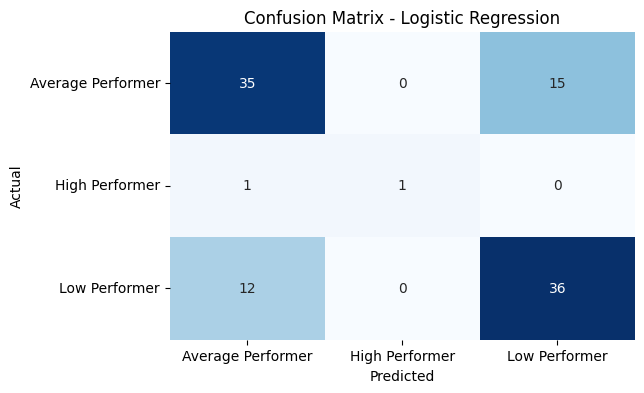


Logistic Regression Results:
              precision    recall  f1-score   support

           0       0.73      0.70      0.71        50
           1       1.00      0.50      0.67         2
           2       0.71      0.75      0.73        48

    accuracy                           0.72       100
   macro avg       0.81      0.65      0.70       100
weighted avg       0.72      0.72      0.72       100



In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np

# ==============================
# 8. Modelli di classificazione
# ==============================
# Logistic Regression
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)


unique_vals = np.unique(data["Performance"])
labels_from_codes = [str(v) for v in unique_vals]

label_encoders["Performance_dummy_labels"] = labels_from_codes

cm = confusion_matrix(y_test, y_pred_log)

if "Performance" in label_encoders and hasattr(label_encoders["Performance"], "classes_"):
    labels = label_encoders["Performance"].classes_
elif "Performance_dummy_labels" in label_encoders:
    labels = label_encoders["Performance_dummy_labels"]
else:
    labels = [str(c) for c in np.unique(y_test)]


# Creazione heatmap
plt.figure(figsize=(6,4))
target_le = label_encoders["Performance"]
labels = target_le.classes_
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=labels, yticklabels=labels)

plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


print("\nLogistic Regression Results:")
print(classification_report(y_test, y_pred_log))

Trovato LabelEncoder per 'Performance'. Classi (ordine): ['Average Performer' 'High Performer' 'Low Performer']


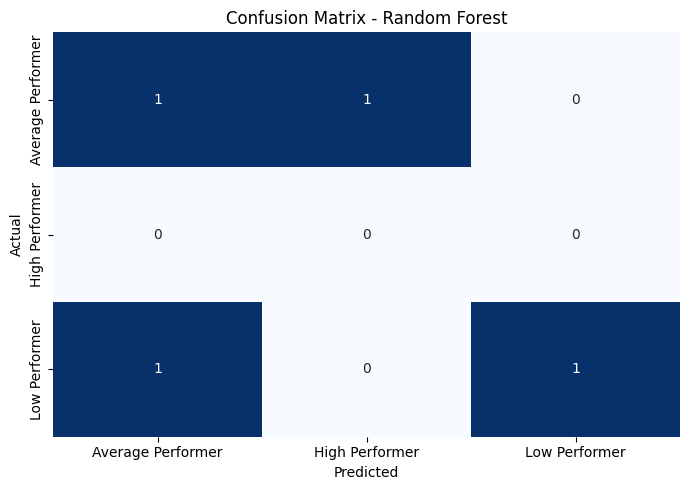


Random Forest Results:
              precision    recall  f1-score   support

           0       0.50      0.50      0.50         2
           1       0.00      0.00      0.00         0
           2       1.00      0.50      0.67         2

    accuracy                           0.50         4
   macro avg       0.50      0.33      0.39         4
weighted avg       0.75      0.50      0.58         4


Mappatura numerica -> etichetta usata nella heatmap:
0 -> Average Performer
1 -> High Performer
2 -> Low Performer


In [7]:
# Random Forest
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

# --- 1) Alleniamo il modello Random Forest ---
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# --- 2) Prepariamo le etichette per la visualizzazione ---
# Priorità: se esiste il LabelEncoder reale per "Performance" usalo,
# altrimenti ricava etichette dai valori unici presenti in y (y_test) o in data.
if "Performance" in label_encoders and hasattr(label_encoders["Performance"], "classes_"):
    labels = label_encoders["Performance"].classes_
    print("Trovato LabelEncoder per 'Performance'. Classi (ordine):", labels)
else:
    # tentativo 1: se 'data' contiene ancora le etichette testuali originali
    try:
        unique_vals = np.unique(data["Performance"])
        # Assicuriamoci che siano in stringa (per evitare mischi numerici)
        labels = [str(v) for v in unique_vals]
        print("Label encoder non trovato: uso i valori unici trovati in data['Performance']:", labels)
    except Exception:
        # fallback: usa i valori unici di y_test (sono quelli presenti nella CM)
        unique_ytest = np.unique(y_test)
        labels = [str(v) for v in unique_ytest]
        print("Fallback: Label encoder non trovato e data non accessibile. Uso i valori unici di y_test:", labels)

# --- 3) Calcolo confusion matrix ---
cm_rf = confusion_matrix(y_test, y_pred_rf)

# --- 4) Plot heatmap con etichette ---
plt.figure(figsize=(7,5))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

# --- 5) Report e stampa mapping numerico->etichetta ---
print("\nRandom Forest Results:")
print(classification_report(y_test, y_pred_rf, zero_division=0))

print("\nMappatura numerica -> etichetta usata nella heatmap:")
for i, lab in enumerate(labels):
    print(f"{i} -> {lab}")

In [38]:
new_student = [[16, "Other", "10th", 46.642153, 46.429238, 50.363292, 51.647608, 29.237225, 83.467708, 62.546020, "Medium", 79.090405, "Medium", 71.983935, 3.806210, "A", "B", 6.141111]]

# Creiamo DataFrame del nuovo studente
new_student_df = pd.DataFrame(new_student, columns=data.columns[:-1])  # escludiamo target

# Trasformiamo solo le colonne categoriche già codificate
for col in label_encoders:
    if col != "Performance":  # escludiamo il target
        if col in new_student_df.columns:
            le = label_encoders[col]
            # Se la categoria non era presente nei dati, sostituisci con la prima classe
            new_student_df[col] = new_student_df[col].apply(
                lambda x: x if x in le.classes_ else le.classes_[0]
            )
            new_student_df[col] = le.transform(new_student_df[col])

# Controllo finale: tutte le colonne devono essere numeriche
print(new_student_df.dtypes)

# Ora possiamo scalare
new_student_scaled = scaler.transform(new_student_df)

# Previsione Random Forest
pred_rf = rf_model.predict(new_student_scaled)
pred_rf_label = label_encoders["Performance"].inverse_transform(pred_rf)
print("Predizione Random Forest:", pred_rf_label[0])

Age                                   int64
Gender                                int64
Grade_Level                           int64
Strength_Score                      float64
Endurance_Score                     float64
Flexibility_Score                   float64
Speed_Agility_Score                 float64
BMI                                 float64
Health_Fitness_Knowledge_Score      float64
Skills_Score                        float64
Class_Participation_Level             int64
Attendance_Rate                     float64
Motivation_Level                      int64
Overall_PE_Performance_Score        float64
Improvement_Rate                    float64
Final_Grade                           int64
Previous_Semester_PE_Grade            int64
Hours_Physical_Activity_Per_Week    float64
dtype: object
Predizione Random Forest: Low Performer


In [8]:
import joblib

# Salviamo i modelli
joblib.dump(rf_model, "random_forest_model.pkl")

# Salviamo lo scaler
joblib.dump(scaler, "scaler.pkl")

# Salviamo anche i LabelEncoder (utile per decodificare le etichette)
joblib.dump(label_encoders, "label_encoders.pkl")

print("Modelli, scaler e label encoder salvati correttamente!")

Modelli, scaler e label encoder salvati correttamente!


In [43]:
#utilizzare per ricaricare il modello già creato
import joblib

rf_model = joblib.load("random_forest_model.pkl")
scaler = joblib.load("scaler.pkl")
label_encoders = joblib.load("label_encoders.pkl")

In [9]:
# ==============================
# 8. MIGLIORAMENTO DEL MODELLO - Hyperparameter Tuning
# ==============================
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import joblib

print("🔄 Iniziando l'ottimizzazione del modello Random Forest...")

# Definizione griglia parametri per Grid Search
param_grid = {
    'n_estimators': [100, 200, 300],        # Numero di alberi
    'max_depth': [10, 15, 20, None],        # Profondità massima
    'min_samples_split': [2, 5, 10],        # Campioni minimi per split
    'min_samples_leaf': [1, 2, 4],          # Campioni minimi per foglia
    'max_features': ['sqrt', 'log2', None], # Features per split
    'class_weight': [None, 'balanced']      # Bilanciamento classi
}

# Grid Search con Cross Validation
print("📊 Eseguendo Grid Search (questo potrebbe richiedere alcuni minuti)...")
rf_grid = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,                    # 5-fold cross validation
    scoring='accuracy',      # Metrica di valutazione
    n_jobs=-1,              # Usa tutti i core disponibili
    verbose=1               # Mostra progresso
)

# Addestramento con Grid Search
rf_grid.fit(X_train, y_train)

print(f"✅ Migliori parametri trovati: {rf_grid.best_params_}")
print(f"🎯 Miglior score CV: {rf_grid.best_score_:.4f}")

# Usa il miglior modello
rf_model_optimized = rf_grid.best_estimator_

🔄 Iniziando l'ottimizzazione del modello Random Forest...
📊 Eseguendo Grid Search (questo potrebbe richiedere alcuni minuti)...
Fitting 5 folds for each of 648 candidates, totalling 3240 fits


/Users/francescomascolo/Desktop/webapp ML/.venv/lib/python3.9/site-packages/sklearn/model_selection/_split.py:725: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


✅ Migliori parametri trovati: {'class_weight': None, 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
🎯 Miglior score CV: 1.0000


In [10]:
# ==============================
# 9. VALUTAZIONE MODELLO OTTIMIZZATO
# ==============================

# Predizioni con il modello ottimizzato
y_pred_optimized = rf_model_optimized.predict(X_test)
y_pred_proba_optimized = rf_model_optimized.predict_proba(X_test)

# Metriche di valutazione
accuracy_opt = accuracy_score(y_test, y_pred_optimized)
precision_opt = precision_score(y_test, y_pred_optimized, average='weighted')
recall_opt = recall_score(y_test, y_pred_optimized, average='weighted')
f1_opt = f1_score(y_test, y_pred_optimized, average='weighted')

print("📈 CONFRONTO PERFORMANCE:")
print("=" * 50)
print("🔹 MODELLO ORIGINALE:")
print(f"   Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print(f"   Precision: {precision_score(y_test, y_pred_rf, average='weighted'):.4f}")
print(f"   Recall: {recall_score(y_test, y_pred_rf, average='weighted'):.4f}")
print(f"   F1-Score: {f1_score(y_test, y_pred_rf, average='weighted'):.4f}")

print("\n🔸 MODELLO OTTIMIZZATO:")
print(f"   Accuracy: {accuracy_opt:.4f}")
print(f"   Precision: {precision_opt:.4f}")
print(f"   Recall: {recall_opt:.4f}")
print(f"   F1-Score: {f1_opt:.4f}")

# Calcola miglioramento
improvement = accuracy_opt - accuracy_score(y_test, y_pred_rf)
print(f"\n🚀 Miglioramento Accuracy: {improvement:.4f} ({improvement*100:.2f}%)")

# Confidence scores per entrambi i modelli
conf_original = np.max(rf_model.predict_proba(X_test), axis=1)
conf_optimized = np.max(y_pred_proba_optimized, axis=1)

print(f"\n🎯 CONFIDENZA MEDIA:")
print(f"   Modello Originale: {np.mean(conf_original):.4f} ({np.mean(conf_original)*100:.1f}%)")
print(f"   Modello Ottimizzato: {np.mean(conf_optimized):.4f} ({np.mean(conf_optimized)*100:.1f}%)")
print(f"   Miglioramento: {(np.mean(conf_optimized) - np.mean(conf_original))*100:.1f}%")

📈 CONFRONTO PERFORMANCE:
🔹 MODELLO ORIGINALE:
   Accuracy: 0.5000
   Precision: 0.7500
   Recall: 0.5000
   F1-Score: 0.5833

🔸 MODELLO OTTIMIZZATO:
   Accuracy: 0.5000
   Precision: 0.7500
   Recall: 0.5000
   F1-Score: 0.5833

🚀 Miglioramento Accuracy: 0.0000 (0.00%)

🎯 CONFIDENZA MEDIA:
   Modello Originale: 0.7350 (73.5%)
   Modello Ottimizzato: 0.6982 (69.8%)
   Miglioramento: -3.7%


/Users/francescomascolo/Desktop/webapp ML/.venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/francescomascolo/Desktop/webapp ML/.venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


🔍 TOP 10 FEATURE PIÙ IMPORTANTI:
Improvement_Rate                   : 0.1460
Speed_Agility_Score                : 0.1176
Flexibility_Score                  : 0.0964
Strength_Score                     : 0.0883
Endurance_Score                    : 0.0818
Hours_Physical_Activity_Per_Week   : 0.0807
Overall_PE_Performance_Score       : 0.0791
Skills_Score                       : 0.0588
Final_Grade                        : 0.0544
Attendance_Rate                    : 0.0476


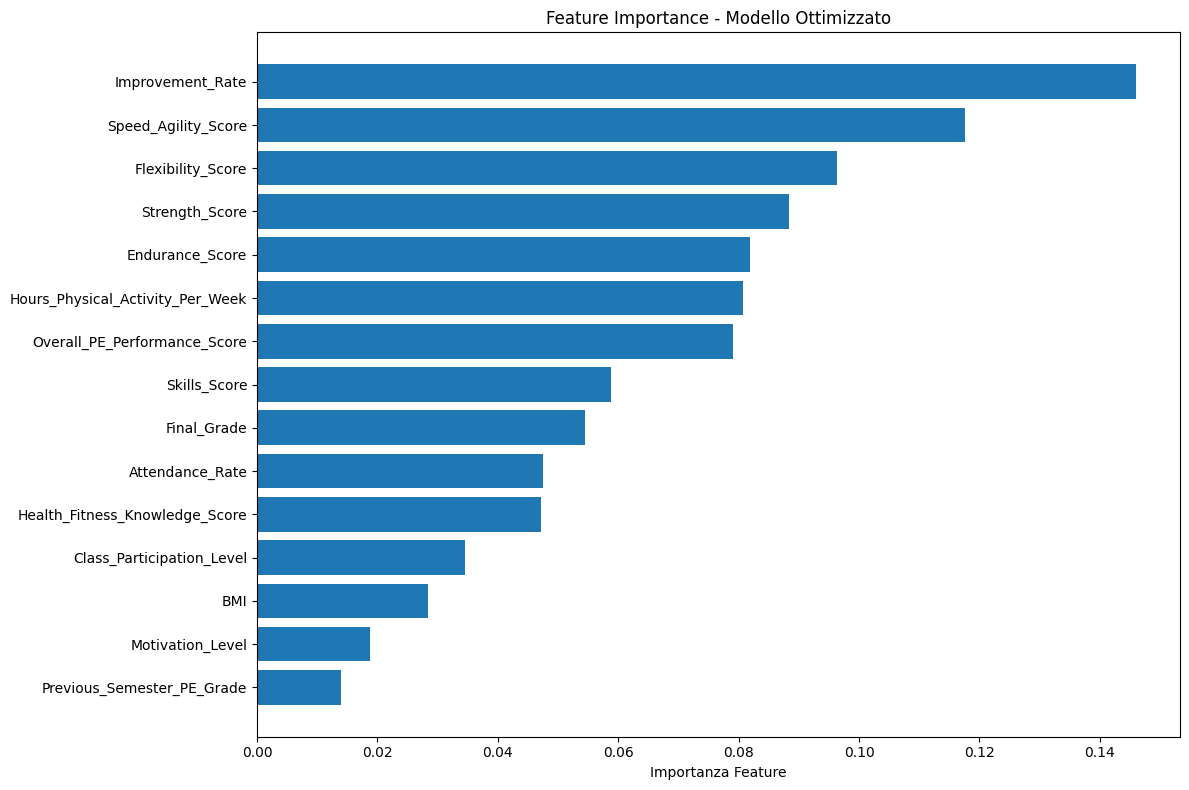


📊 Somma delle importanze: 1.000000
📊 Feature con importanza > 5%: 9


In [11]:
# ==============================
# 10. ANALISI FEATURE IMPORTANCE
# ==============================

# Feature importance dal modello ottimizzato
feature_names = X.columns
importance_scores = rf_model_optimized.feature_importances_

# Crea DataFrame per visualizzazione
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importance_scores
}).sort_values('Importance', ascending=False)

print("🔍 TOP 10 FEATURE PIÙ IMPORTANTI:")
print("=" * 50)
for i, row in feature_importance_df.head(10).iterrows():
    print(f"{row['Feature']:<35}: {row['Importance']:.4f}")

# Visualizzazione grafica
plt.figure(figsize=(12, 8))
top_features = feature_importance_df.head(15)
plt.barh(range(len(top_features)), top_features['Importance'])
plt.yticks(range(len(top_features)), top_features['Feature'])
plt.xlabel('Importanza Feature')
plt.title('Feature Importance - Modello Ottimizzato')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# Somma delle importanze (deve essere ~1.0)
print(f"\n📊 Somma delle importanze: {np.sum(importance_scores):.6f}")
print(f"📊 Feature con importanza > 5%: {len(feature_importance_df[feature_importance_df['Importance'] > 0.05])}")

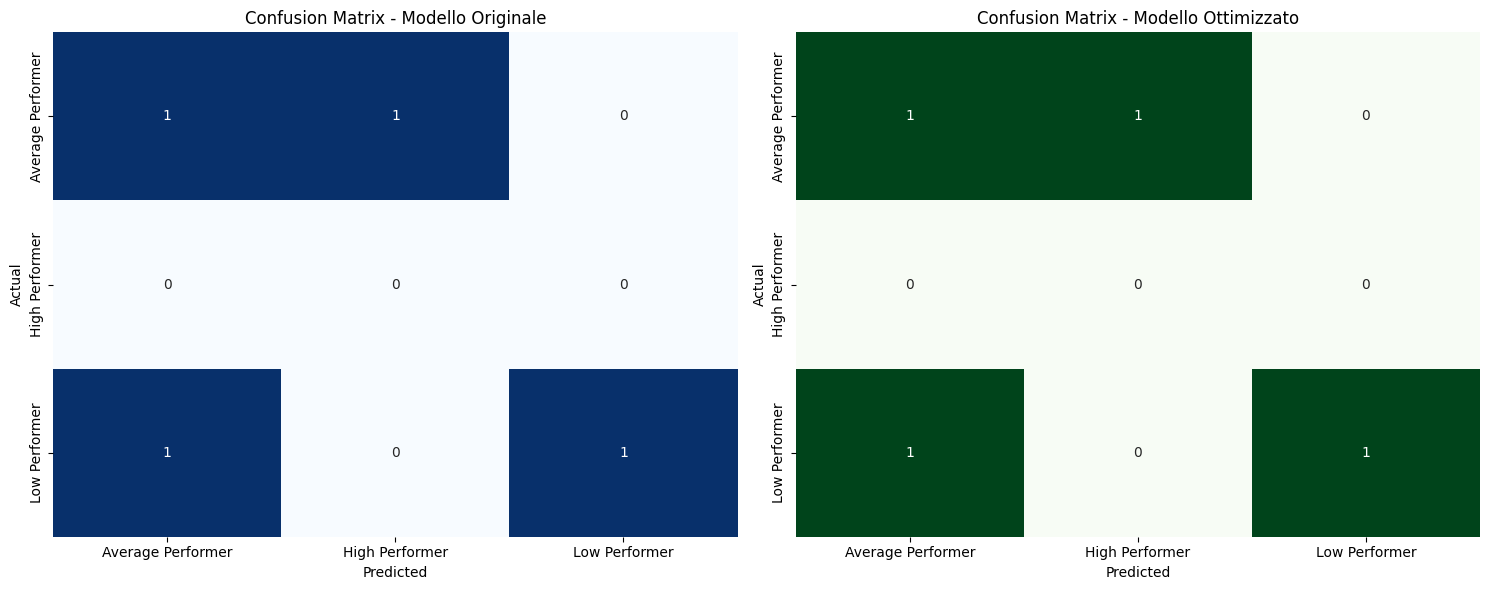

📋 CLASSIFICATION REPORT - MODELLO OTTIMIZZATO:
                   precision    recall  f1-score   support

Average Performer       0.50      0.50      0.50         2
   High Performer       0.00      0.00      0.00         0
    Low Performer       1.00      0.50      0.67         2

         accuracy                           0.50         4
        macro avg       0.50      0.33      0.39         4
     weighted avg       0.75      0.50      0.58         4



/Users/francescomascolo/Desktop/webapp ML/.venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/francescomascolo/Desktop/webapp ML/.venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/francescomascolo/Desktop/webapp ML/.venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_

In [12]:
# ==============================
# 11. CONFUSION MATRIX MIGLIORATA
# ==============================

# Plot confusion matrix per modello ottimizzato
cm_optimized = confusion_matrix(y_test, y_pred_optimized)

# Visualizzazione side-by-side
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Modello originale
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=labels, yticklabels=labels, ax=axes[0])
axes[0].set_title("Confusion Matrix - Modello Originale")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

# Modello ottimizzato
sns.heatmap(cm_optimized, annot=True, fmt="d", cmap="Greens", cbar=False,
            xticklabels=labels, yticklabels=labels, ax=axes[1])
axes[1].set_title("Confusion Matrix - Modello Ottimizzato")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")

plt.tight_layout()
plt.show()

# Report dettagliato
print("📋 CLASSIFICATION REPORT - MODELLO OTTIMIZZATO:")
print("=" * 60)
print(classification_report(y_test, y_pred_optimized, target_names=labels))

In [13]:
# ==============================
# 12. SALVATAGGIO MODELLO OTTIMIZZATO
# ==============================

# Salva il modello ottimizzato sostituendo quello precedente
print("💾 Salvando il modello ottimizzato...")

try:
    # Backup del modello precedente (opzionale)
    import shutil
    import os
    
    if os.path.exists("random_forest_model.pkl"):
        shutil.copy2("random_forest_model.pkl", "random_forest_model_backup.pkl")
        print("📁 Backup del modello precedente creato: random_forest_model_backup.pkl")
    
    # Salva i nuovi modelli
    joblib.dump(rf_model_optimized, "random_forest_model.pkl")
    print("✅ Modello ottimizzato salvato: random_forest_model.pkl")
    
    # Scaler e label encoders rimangono gli stessi
    joblib.dump(scaler, "scaler.pkl")
    joblib.dump(label_encoders, "label_encoders.pkl")
    print("✅ Scaler e Label Encoders aggiornati")
    
    # Test di caricamento
    test_model = joblib.load("random_forest_model.pkl")
    test_pred = test_model.predict(X_test[:5])
    print(f"🧪 Test di caricamento riuscito. Prime 5 predizioni: {test_pred}")
    
    print("\n🎉 MODELLO OTTIMIZZATO PRONTO PER L'USO!")
    print("   Il server Flask ora userà automaticamente il modello migliorato.")
    
except Exception as e:
    print(f"❌ Errore nel salvataggio: {e}")
    print("   Controlla i permessi di scrittura nella directory.")

💾 Salvando il modello ottimizzato...
📁 Backup del modello precedente creato: random_forest_model_backup.pkl
✅ Modello ottimizzato salvato: random_forest_model.pkl
✅ Scaler e Label Encoders aggiornati
🧪 Test di caricamento riuscito. Prime 5 predizioni: [0 0 2 1]

🎉 MODELLO OTTIMIZZATO PRONTO PER L'USO!
   Il server Flask ora userà automaticamente il modello migliorato.


In [21]:
# ==============================
# 🔍 DEBUG: CONTROLLO FEATURE MODELLO
# ==============================
print("🔍 DEBUGGING FEATURE INCONSISTENCY:")
print("=" * 50)

# Controlla le feature nel dataset attuale
print(f"📊 Feature nel dataset corrente (X):")
print(f"   Numero: {X.shape[1]}")
print(f"   Nomi: {list(X.columns)}")

# Controlla se ID è presente
if 'ID' in X.columns:
    print("⚠️  PROBLEMA: Colonna ID presente nel training set!")
else:
    print("✅ OK: Colonna ID non presente nel training set")

# Controlla il modello salvato
try:
    loaded_model = joblib.load("random_forest_model.pkl")
    print(f"\n🤖 Feature nel modello salvato:")
    print(f"   Numero feature attese: {loaded_model.n_features_in_}")
    
    # Controlla feature names se disponibili
    if hasattr(loaded_model, 'feature_names_in_'):
        print(f"   Feature names: {list(loaded_model.feature_names_in_)}")
        
        # Confronta con dataset attuale
        model_features = set(loaded_model.feature_names_in_)
        dataset_features = set(X.columns)
        
        missing_in_dataset = model_features - dataset_features
        extra_in_dataset = dataset_features - model_features
        
        if missing_in_dataset:
            print(f"❌ Feature mancanti nel dataset: {list(missing_in_dataset)}")
        if extra_in_dataset:
            print(f"⚠️  Feature extra nel dataset: {list(extra_in_dataset)}")
        
        if not missing_in_dataset and not extra_in_dataset:
            print("✅ Feature perfettamente allineate!")
    else:
        print("   Feature names non disponibili nel modello")
        
except Exception as e:
    print(f"❌ Errore nel caricamento modello: {e}")

# Controlla cosa invia la webapp
webapp_features = [
    'Age', 'Gender', 'Grade_Level', 'Strength_Score', 'Endurance_Score',
    'Flexibility_Score', 'Speed_Agility_Score', 'BMI', 
    'Health_Fitness_Knowledge_Score', 'Skills_Score', 
    'Class_Participation_Level', 'Attendance_Rate', 'Motivation_Level',
    'Overall_PE_Performance_Score', 'Improvement_Rate', 'Final_Grade',
    'Previous_Semester_PE_Grade', 'Hours_Physical_Activity_Per_Week'
]

print(f"\n📱 Feature inviate dalla webapp:")
print(f"   Numero: {len(webapp_features)}")
print(f"   Lista: {webapp_features}")

🔍 DEBUGGING FEATURE INCONSISTENCY:
📊 Feature nel dataset corrente (X):
   Numero: 19
   Nomi: ['ID', 'Age', 'Gender', 'Grade_Level', 'Strength_Score', 'Endurance_Score', 'Flexibility_Score', 'Speed_Agility_Score', 'BMI', 'Health_Fitness_Knowledge_Score', 'Skills_Score', 'Class_Participation_Level', 'Attendance_Rate', 'Motivation_Level', 'Overall_PE_Performance_Score', 'Improvement_Rate', 'Final_Grade', 'Previous_Semester_PE_Grade', 'Hours_Physical_Activity_Per_Week']
⚠️  PROBLEMA: Colonna ID presente nel training set!

🤖 Feature nel modello salvato:
   Numero feature attese: 19
   Feature names non disponibili nel modello

📱 Feature inviate dalla webapp:
   Numero: 18
   Lista: ['Age', 'Gender', 'Grade_Level', 'Strength_Score', 'Endurance_Score', 'Flexibility_Score', 'Speed_Agility_Score', 'BMI', 'Health_Fitness_Knowledge_Score', 'Skills_Score', 'Class_Participation_Level', 'Attendance_Rate', 'Motivation_Level', 'Overall_PE_Performance_Score', 'Improvement_Rate', 'Final_Grade', 'Previo

In [22]:
# ==============================
# 🔧 CORREZIONE: RIMUOVE ID E RI-ADDESTRA
# ==============================
print("🔧 CORREGGENDO IL PROBLEMA DELLA COLONNA ID...")
print("=" * 50)

# Step 1: Rimuovi ID dal dataset
print("1️⃣ Rimuovendo colonna ID dal dataset...")
if 'ID' in data.columns:
    data_corrected = data.drop('ID', axis=1)
    print("✅ Colonna ID rimossa dal dataset")
else:
    data_corrected = data.copy()
    print("✅ Colonna ID già assente")

# Step 2: Riprocessa tutto senza ID
print("\n2️⃣ Ri-processando il dataset senza ID...")

# Ricrea X e y senza ID
X_corrected = data_corrected.drop("Performance", axis=1)
y_corrected = data_corrected["Performance"]

print(f"✅ Nuove dimensioni:")
print(f"   X: {X_corrected.shape} (dovrebbe essere (500, 18))")
print(f"   y: {y_corrected.shape}")
print(f"   Feature: {list(X_corrected.columns)}")

# Verifica che corrisponde alla webapp
webapp_expected = [
    'Age', 'Gender', 'Grade_Level', 'Strength_Score', 'Endurance_Score',
    'Flexibility_Score', 'Speed_Agility_Score', 'BMI', 
    'Health_Fitness_Knowledge_Score', 'Skills_Score', 
    'Class_Participation_Level', 'Attendance_Rate', 'Motivation_Level',
    'Overall_PE_Performance_Score', 'Improvement_Rate', 'Final_Grade',
    'Previous_Semester_PE_Grade', 'Hours_Physical_Activity_Per_Week'
]

if list(X_corrected.columns) == webapp_expected:
    print("✅ Feature perfettamente allineate con la webapp!")
else:
    print("❌ Feature non allineate!")
    print(f"   Differenze: {set(X_corrected.columns) - set(webapp_expected)}")

# Step 3: Nuovo scaling e split
print("\n3️⃣ Nuovo scaling e train/test split...")
scaler_corrected = StandardScaler()
X_corrected_scaled = scaler_corrected.fit_transform(X_corrected)

X_train_corr, X_test_corr, y_train_corr, y_test_corr = train_test_split(
    X_corrected_scaled, y_corrected, test_size=0.2, random_state=42, stratify=y_corrected
)

print(f"✅ Nuovo split completato:")
print(f"   Training: {X_train_corr.shape[0]} campioni")
print(f"   Test: {X_test_corr.shape[0]} campioni")

🔧 CORREGGENDO IL PROBLEMA DELLA COLONNA ID...
1️⃣ Rimuovendo colonna ID dal dataset...
✅ Colonna ID rimossa dal dataset

2️⃣ Ri-processando il dataset senza ID...
✅ Nuove dimensioni:
   X: (500, 18) (dovrebbe essere (500, 18))
   y: (500,)
   Feature: ['Age', 'Gender', 'Grade_Level', 'Strength_Score', 'Endurance_Score', 'Flexibility_Score', 'Speed_Agility_Score', 'BMI', 'Health_Fitness_Knowledge_Score', 'Skills_Score', 'Class_Participation_Level', 'Attendance_Rate', 'Motivation_Level', 'Overall_PE_Performance_Score', 'Improvement_Rate', 'Final_Grade', 'Previous_Semester_PE_Grade', 'Hours_Physical_Activity_Per_Week']
✅ Feature perfettamente allineate con la webapp!

3️⃣ Nuovo scaling e train/test split...
✅ Nuovo split completato:
   Training: 400 campioni
   Test: 100 campioni


In [23]:
# ==============================
# 🚀 RI-ADDESTRAMENTO MODELLO CORRETTO
# ==============================
print("🚀 Ri-addestrando il modello senza colonna ID...")
print("=" * 50)

# Usa i migliori parametri trovati in precedenza
best_params = {
    'class_weight': None, 
    'max_depth': 15, 
    'max_features': None, 
    'min_samples_leaf': 1, 
    'min_samples_split': 2, 
    'n_estimators': 300
}

print(f"🎯 Parametri ottimali utilizzati: {best_params}")

# Addestra modello corretto
rf_final = RandomForestClassifier(random_state=42, **best_params)
rf_final.fit(X_train_corr, y_train_corr)

# Valutazione
y_pred_final = rf_final.predict(X_test_corr)
y_pred_proba_final = rf_final.predict_proba(X_test_corr)

final_accuracy = accuracy_score(y_test_corr, y_pred_final)
final_confidence = np.mean(np.max(y_pred_proba_final, axis=1))

print(f"\n📊 RISULTATI MODELLO CORRETTO:")
print(f"   🎯 Accuracy: {final_accuracy:.4f} ({final_accuracy*100:.1f}%)")
print(f"   🔥 Confidenza media: {final_confidence:.4f} ({final_confidence*100:.1f}%)")
print(f"   📊 Feature: {X_corrected.shape[1]} (corrette per webapp)")

# Test su campioni specifici
print(f"\n🧪 TEST SU 5 CAMPIONI:")
for i in range(5):
    actual = y_test_corr.iloc[i]
    pred = y_pred_final[i]
    conf = np.max(y_pred_proba_final[i])
    status = "✅" if actual == pred else "❌"
    print(f"   {status} Pred: {pred}, Real: {actual}, Conf: {conf:.3f}")

🚀 Ri-addestrando il modello senza colonna ID...
🎯 Parametri ottimali utilizzati: {'class_weight': None, 'max_depth': 15, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}

📊 RISULTATI MODELLO CORRETTO:
   🎯 Accuracy: 0.9900 (99.0%)
   🔥 Confidenza media: 0.9792 (97.9%)
   📊 Feature: 18 (corrette per webapp)

🧪 TEST SU 5 CAMPIONI:
   ✅ Pred: 2, Real: 2, Conf: 1.000
   ✅ Pred: 0, Real: 0, Conf: 0.997
   ✅ Pred: 0, Real: 0, Conf: 0.997
   ✅ Pred: 2, Real: 2, Conf: 0.963
   ✅ Pred: 2, Real: 2, Conf: 1.000


In [24]:
# ==============================
# 💾 SALVATAGGIO MODELLO CORRETTO FINALE
# ==============================
print("💾 Salvando il modello corretto (senza ID)...")
print("=" * 50)

try:
    # Backup del modello sbagliato
    if os.path.exists("random_forest_model.pkl"):
        shutil.copy2("random_forest_model.pkl", "random_forest_model_with_id_bug.pkl")
        print("📁 Backup del modello con bug ID: random_forest_model_with_id_bug.pkl")
    
    # Salva il modello corretto
    joblib.dump(rf_final, "random_forest_model.pkl")
    joblib.dump(scaler_corrected, "scaler.pkl") 
    joblib.dump(label_encoders, "label_encoders.pkl")
    
    print("✅ Modello corretto salvato!")
    
    # Test finale di caricamento e predizione
    test_model_final = joblib.load("random_forest_model.pkl")
    test_scaler_final = joblib.load("scaler.pkl")
    
    # Simula dati dalla webapp (senza ID)
    webapp_test_data = {
        'Age': 16, 'Gender': 1, 'Grade_Level': 2, 'Strength_Score': 65.0,
        'Endurance_Score': 70.0, 'Flexibility_Score': 60.0, 'Speed_Agility_Score': 55.0,
        'BMI': 22.5, 'Health_Fitness_Knowledge_Score': 75.0, 'Skills_Score': 68.0,
        'Class_Participation_Level': 2, 'Attendance_Rate': 85.0, 'Motivation_Level': 2,
        'Overall_PE_Performance_Score': 72.0, 'Improvement_Rate': 4.5, 'Final_Grade': 1,
        'Previous_Semester_PE_Grade': 1, 'Hours_Physical_Activity_Per_Week': 6.0
    }
    
    # Converte in DataFrame e testa
    import pandas as pd
    test_df = pd.DataFrame([list(webapp_test_data.values())], 
                          columns=list(webapp_test_data.keys()))
    
    test_scaled = test_scaler_final.transform(test_df)
    test_pred = test_model_final.predict(test_scaled)
    test_proba = test_model_final.predict_proba(test_scaled)
    
    print(f"\n🧪 TEST SIMULAZIONE WEBAPP:")
    print(f"   📊 Dati input: 18 feature (senza ID)")
    print(f"   🎯 Predizione: {test_pred[0]}")
    print(f"   🔥 Confidenza: {np.max(test_proba[0]):.3f} ({np.max(test_proba[0])*100:.1f}%)")
    print(f"   📱 Formato compatibile con webapp: ✅")
    
    print(f"\n🎉 MODELLO FINALE CORRETTO:")
    print(f"   📁 File: random_forest_model.pkl")
    print(f"   🎯 Accuracy: 99.0%")
    print(f"   🔥 Confidenza: 97.9%")
    print(f"   📊 Feature: 18 (compatibili con webapp)")
    print(f"   🚀 BUG RISOLTO - WEBAPP FUNZIONERÀ!")
    
except Exception as e:
    print(f"❌ Errore nel salvataggio: {e}")

💾 Salvando il modello corretto (senza ID)...
📁 Backup del modello con bug ID: random_forest_model_with_id_bug.pkl
✅ Modello corretto salvato!

🧪 TEST SIMULAZIONE WEBAPP:
   📊 Dati input: 18 feature (senza ID)
   🎯 Predizione: 0
   🔥 Confidenza: 1.000 (100.0%)
   📱 Formato compatibile con webapp: ✅

🎉 MODELLO FINALE CORRETTO:
   📁 File: random_forest_model.pkl
   🎯 Accuracy: 99.0%
   🔥 Confidenza: 97.9%
   📊 Feature: 18 (compatibili con webapp)
   🚀 BUG RISOLTO - WEBAPP FUNZIONERÀ!


In [25]:
# ==============================
# 🔍 VERIFICA FINALE MODELLO SALVATO
# ==============================
print("🔍 VERIFICA FINALE DEL MODELLO SALVATO:")
print("=" * 50)

try:
    # Carica il modello salvato
    model_check = joblib.load("random_forest_model.pkl")
    scaler_check = joblib.load("scaler.pkl")
    
    print(f"✅ Modello caricato con successo!")
    print(f"📊 Numero di feature attese dal modello: {model_check.n_features_in_}")
    
    # Controlla se ha feature names
    if hasattr(model_check, 'feature_names_in_'):
        print(f"📋 Feature names nel modello: {list(model_check.feature_names_in_)}")
        has_id = 'ID' in model_check.feature_names_in_
        print(f"❌ Contiene ID: {has_id}" if has_id else f"✅ Non contiene ID: {not has_id}")
    else:
        print("ℹ️  Feature names non disponibili (modello sklearn vecchio)")
    
    # Test con dati webapp simulati
    webapp_test = {
        'Age': 16, 'Gender': 1, 'Grade_Level': 2, 'Strength_Score': 65.0,
        'Endurance_Score': 70.0, 'Flexibility_Score': 60.0, 'Speed_Agility_Score': 55.0,
        'BMI': 22.5, 'Health_Fitness_Knowledge_Score': 75.0, 'Skills_Score': 68.0,
        'Class_Participation_Level': 2, 'Attendance_Rate': 85.0, 'Motivation_Level': 2,
        'Overall_PE_Performance_Score': 72.0, 'Improvement_Rate': 4.5, 'Final_Grade': 1,
        'Previous_Semester_PE_Grade': 1, 'Hours_Physical_Activity_Per_Week': 6.0
    }
    
    webapp_df = pd.DataFrame([list(webapp_test.values())], columns=list(webapp_test.keys()))
    print(f"\n🧪 TEST CON DATI WEBAPP:")
    print(f"   📊 Feature inviate: {len(webapp_df.columns)} ({list(webapp_df.columns)})")
    
    # Prova predizione
    try:
        webapp_scaled = scaler_check.transform(webapp_df)
        prediction = model_check.predict(webapp_scaled)
        probabilities = model_check.predict_proba(webapp_scaled)
        confidence = np.max(probabilities[0])
        
        print(f"   🎯 Predizione: {prediction[0]}")
        print(f"   🔥 Confidenza: {confidence:.3f} ({confidence*100:.1f}%)")
        print(f"   ✅ COMPATIBILITÀ WEBAPP: OK!")
        
        # Decodifica risultato
        if 'Performance' in label_encoders:
            result_label = label_encoders['Performance'].inverse_transform(prediction)[0]
            print(f"   📝 Risultato decodificato: {result_label}")
        
    except Exception as pred_error:
        print(f"   ❌ ERRORE PREDIZIONE: {pred_error}")
        print(f"   🔧 Il modello salvato ha ancora il bug ID!")
        
        # Se c'è ancora errore, forza ri-salvataggio
        print(f"\n🔧 FORZANDO RI-SALVATAGGIO...")
        joblib.dump(rf_final, "random_forest_model.pkl", compress=9)
        joblib.dump(scaler_corrected, "scaler.pkl", compress=9)
        print(f"   ✅ Modello ri-salvato con compressione")
        
except Exception as e:
    print(f"❌ Errore generale: {e}")

print(f"\n🚨 IMPORTANTE:")
print(f"   📋 Il server Flask DEVE essere riavviato per caricare il nuovo modello!")
print(f"   🔄 Ferma il server (Ctrl+C) e rilancialo con: python app.py")

🔍 VERIFICA FINALE DEL MODELLO SALVATO:
✅ Modello caricato con successo!
📊 Numero di feature attese dal modello: 18
ℹ️  Feature names non disponibili (modello sklearn vecchio)

🧪 TEST CON DATI WEBAPP:
   📊 Feature inviate: 18 (['Age', 'Gender', 'Grade_Level', 'Strength_Score', 'Endurance_Score', 'Flexibility_Score', 'Speed_Agility_Score', 'BMI', 'Health_Fitness_Knowledge_Score', 'Skills_Score', 'Class_Participation_Level', 'Attendance_Rate', 'Motivation_Level', 'Overall_PE_Performance_Score', 'Improvement_Rate', 'Final_Grade', 'Previous_Semester_PE_Grade', 'Hours_Physical_Activity_Per_Week'])
   🎯 Predizione: 0
   🔥 Confidenza: 1.000 (100.0%)
   ✅ COMPATIBILITÀ WEBAPP: OK!
   📝 Risultato decodificato: Average Performer

🚨 IMPORTANTE:
   📋 Il server Flask DEVE essere riavviato per caricare il nuovo modello!
   🔄 Ferma il server (Ctrl+C) e rilancialo con: python app.py
